## About Dataset

### Description
This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

### Column Descriptions
| Attribute                    | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| Hours_Studied                | Number of hours spent studying per week.                                     |
| Attendance                   | Percentage of classes attended.                                              |
| Parental_Involvement         | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources          | Availability of educational resources (Low, Medium, High).                   |
| Extracurricular_Activities   | Participation in extracurricular activities (Yes, No).                       |
| Sleep_Hours                  | Average number of hours of sleep per night.                                  |
| Previous_Scores              | Scores from previous exams.                                                  |
| Motivation_Level             | Student's level of motivation (Low, Medium, High).                           |
| Internet_Access              | Availability of internet access (Yes, No).                                   |
| Tutoring_Sessions            | Number of tutoring sessions attended per month.                              |
| Family_Income                | Family income level (Low, Medium, High).                                     |
| Teacher_Quality              | Quality of the teachers (Low, Medium, High).                                 |
| School_Type                  | Type of school attended (Public, Private).                                   |
| Peer_Influence               | Influence of peers on academic performance (Positive, Neutral, Negative).    |
| Physical_Activity            | Average number of hours of physical activity per week.                       |
| Learning_Disabilities        | Presence of learning disabilities (Yes, No).                                 |
| Parental_Education_Level     | Highest education level of parents (High School, College, Postgraduate).     |
| Distance_from_Home           | Distance from home to school (Near, Moderate, Far).                          |
| Gender                       | Gender of the student (Male, Female).                                        |
| Exam_Score                   | Final exam score.      

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Load data
df = pd.read_csv("StudentPerformanceFactors.csv")


In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Data Vizualization

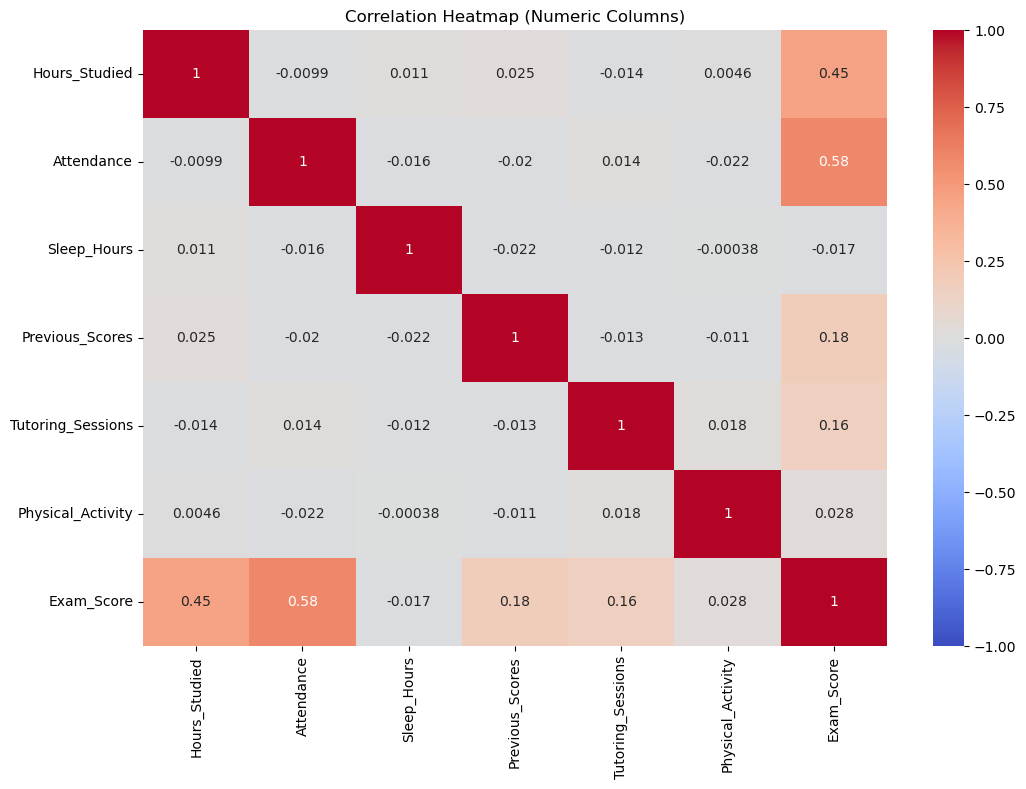

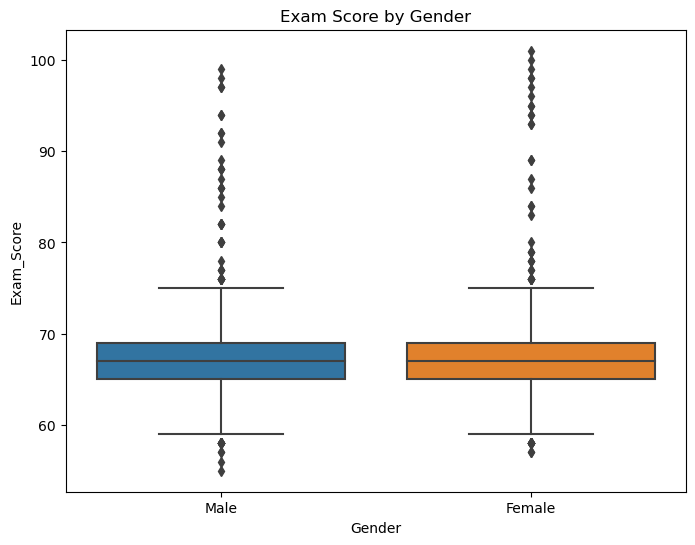

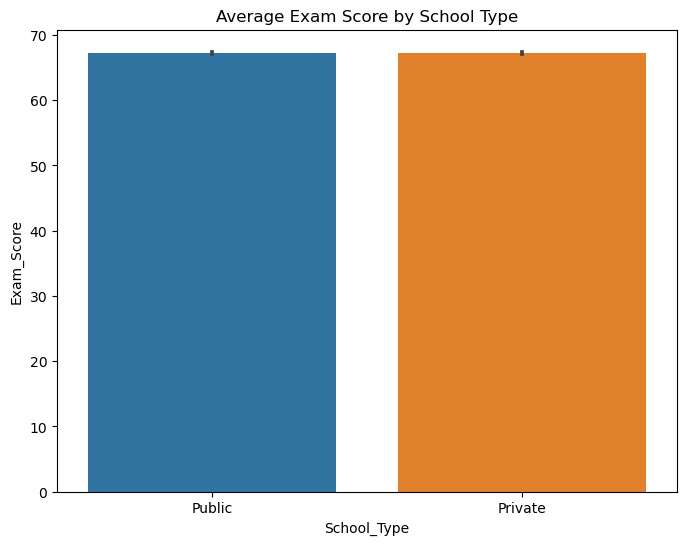

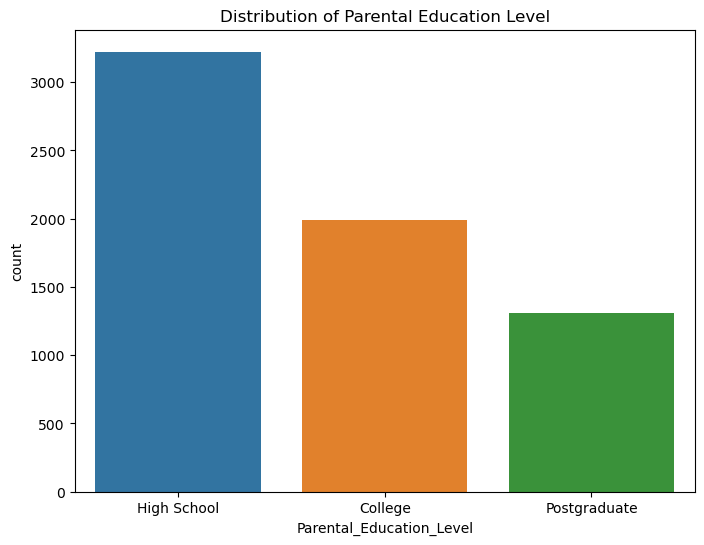

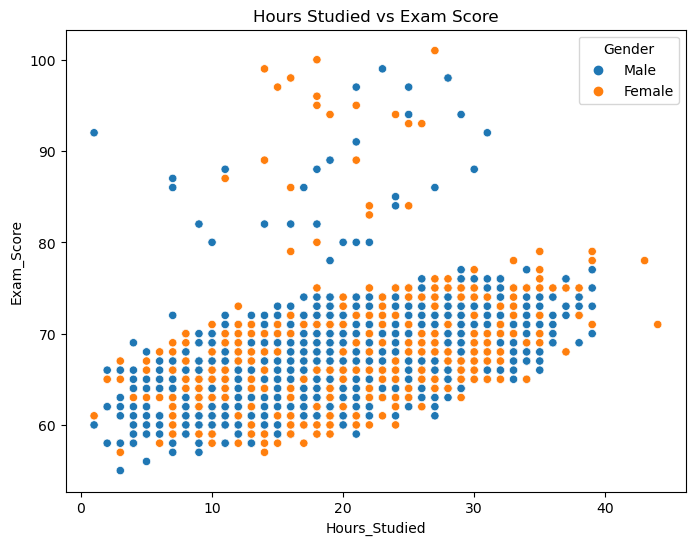

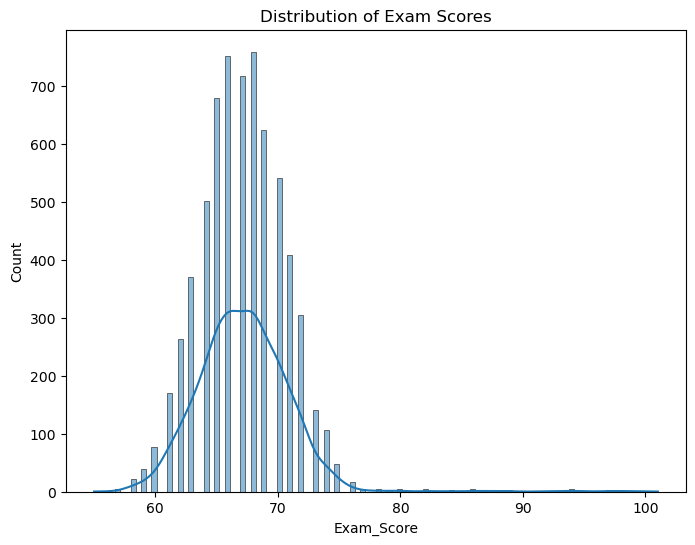

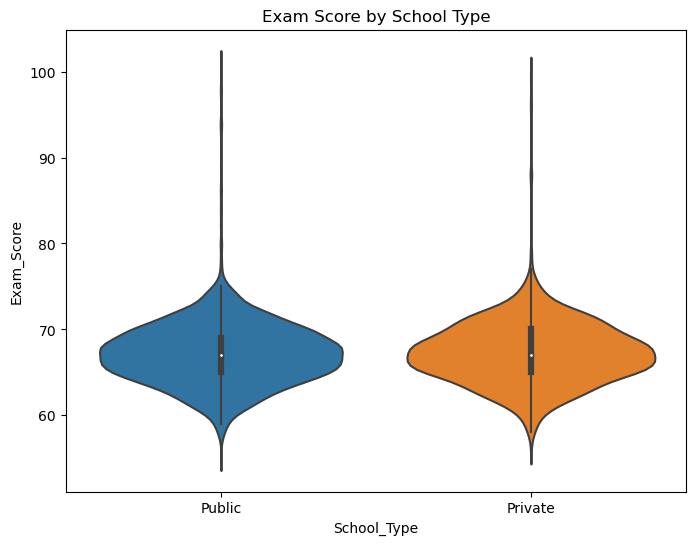

c:\Users\Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.2% of the p

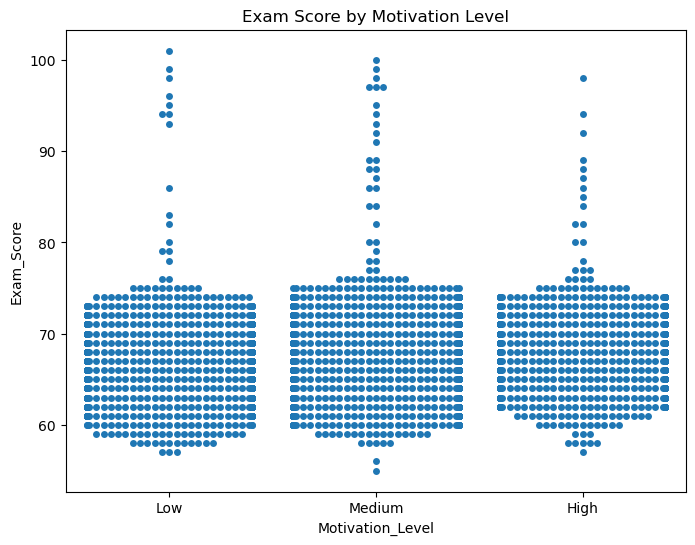

In [4]:
# Select only numeric columns for heatmap and pairplot
numeric_columns = df.select_dtypes(include='number').columns

# Correlation Heatmap (only with numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()


# Boxplot: Exam Score by Gender (categorical vs numeric)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title('Exam Score by Gender')
plt.show()

# Barplot: Average Exam Score by School Type
plt.figure(figsize=(8, 6))
sns.barplot(x='School_Type', y='Exam_Score', data=df)
plt.title('Average Exam Score by School Type')
plt.show()

# Countplot: Parental Education Level (categorical)
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental_Education_Level', data=df)
plt.title('Distribution of Parental Education Level')
plt.show()

# Scatterplot: Hours Studied vs Exam Score (numeric vs numeric)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=df)
plt.title('Hours Studied vs Exam Score')
plt.show()

# Histogram: Distribution of Exam Scores (numeric)
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

# Violinplot: Exam Score by School Type (categorical vs numeric)
plt.figure(figsize=(8, 6))
sns.violinplot(x='School_Type', y='Exam_Score', data=df)
plt.title('Exam Score by School Type')
plt.show()

# Swarmplot: Exam Score by Motivation Level (categorical vs numeric)
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Exam Score by Motivation Level')
plt.show()

### Data Exploration

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# If any missing values are present, you can either:
# 1. Impute missing values with the mean/median for numeric columns or mode for categorical columns
# 2. Drop rows with missing values (for small datasets)

# Imputation for numeric columns (if missing values exist)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Imputation for categorical columns (fill with mode)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# After imputation, verify that there are no more missing values
print("Missing Values after imputation:\n", df.isnull().sum())


Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Missing Values after imputation:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access     

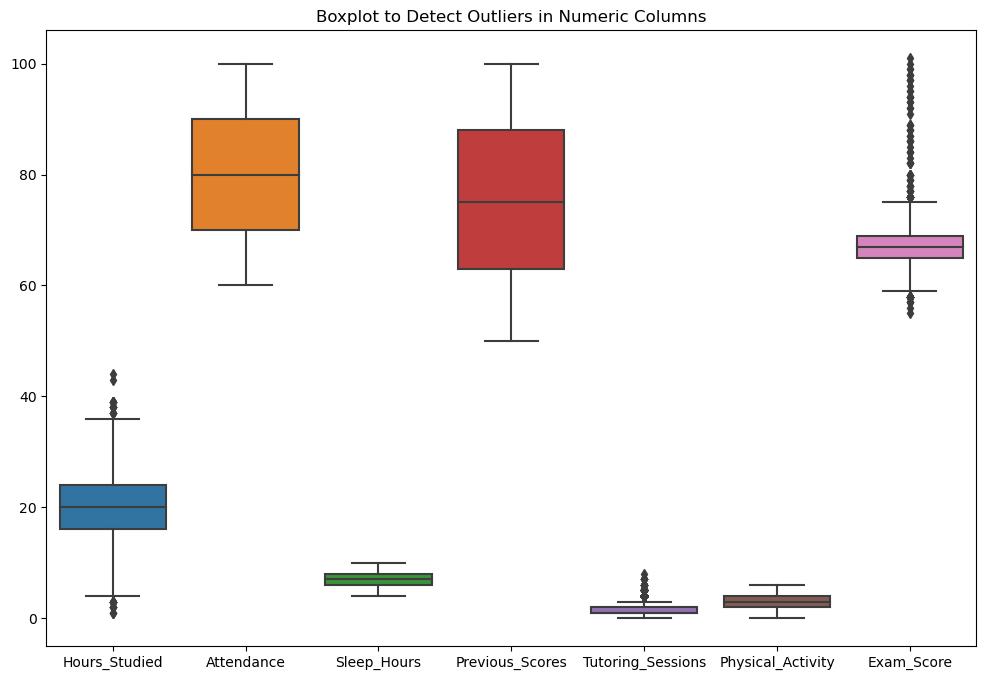

Number of Outliers Detected in Each Numeric Column:
 Hours_Studied        25
Attendance            0
Sleep_Hours           0
Previous_Scores       0
Tutoring_Sessions    26
Physical_Activity     0
Exam_Score           52
dtype: int64
Shape of Data Before and After Outlier Removal: (6607, 20) (6506, 20)


In [6]:
# Boxplot for outlier detection in numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot to Detect Outliers in Numeric Columns')
plt.show()



z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))
outliers = (z_scores > 3).sum(axis=0)
print("Number of Outliers Detected in Each Numeric Column:\n", outliers)

# Handling Outliers: Optionally remove rows with outliers
df_cleaned = df[(z_scores < 3).all(axis=1)]
print("Shape of Data Before and After Outlier Removal:", df.shape, df_cleaned.shape)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [8]:
# Check for unique values in categorical columns to ensure consistency
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:", df[col].unique())

# Convert categorical data to consistent formats (e.g., title case for categorical variables)
df['Gender'] = df['Gender'].str.title()  # Standardize Gender to title case
df['School_Type'] = df['School_Type'].str.title()


Unique values in Parental_Involvement: ['Low' 'Medium' 'High']
Unique values in Access_to_Resources: ['High' 'Medium' 'Low']
Unique values in Extracurricular_Activities: ['No' 'Yes']
Unique values in Motivation_Level: ['Low' 'Medium' 'High']
Unique values in Internet_Access: ['Yes' 'No']
Unique values in Family_Income: ['Low' 'Medium' 'High']
Unique values in Teacher_Quality: ['Medium' 'High' 'Low']
Unique values in School_Type: ['Public' 'Private']
Unique values in Peer_Influence: ['Positive' 'Negative' 'Neutral']
Unique values in Learning_Disabilities: ['No' 'Yes']
Unique values in Parental_Education_Level: ['High School' 'College' 'Postgraduate']
Unique values in Distance_from_Home: ['Near' 'Moderate' 'Far']
Unique values in Gender: ['Male' 'Female']


In [9]:
# Define a capping function to handle outliers
def cap_outliers(df, column, lower_limit, upper_limit):
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

# For Hours_Studied, Tutoring_Sessions, and Exam_Score - cap at 1.5 times IQR
def apply_outlier_capping(df):
    # Define the columns and thresholds to cap
    columns_to_cap = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']
    
    for column in columns_to_cap:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Cap outliers for the specific column
        df = cap_outliers(df, column, lower_limit, upper_limit)
    
    return df

# Apply capping on the dataset
df_cleaned = apply_outlier_capping(df)

In [10]:
# Imputing missing values using mode (most frequent) for categorical columns
df_cleaned['Teacher_Quality'].fillna(df_cleaned['Teacher_Quality'].mode()[0], inplace=True)
df_cleaned['Parental_Education_Level'].fillna(df_cleaned['Parental_Education_Level'].mode()[0], inplace=True)
df_cleaned['Distance_from_Home'].fillna(df_cleaned['Distance_from_Home'].mode()[0], inplace=True)


In [11]:
# Check if categorical values are consistent and in expected range
print("Unique values in 'Teacher_Quality':", df['Teacher_Quality'].unique())
print("Unique values in 'Parental_Education_Level':", df['Parental_Education_Level'].unique())
print("Unique values in 'Distance_from_Home':", df['Distance_from_Home'].unique())


Unique values in 'Teacher_Quality': ['Medium' 'High' 'Low']
Unique values in 'Parental_Education_Level': ['High School' 'College' 'Postgraduate']
Unique values in 'Distance_from_Home': ['Near' 'Moderate' 'Far']


In [12]:
df_cleaned

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,Low,High,No,7,73,Low,Yes,0.0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67.0
1,19.0,64,Low,Medium,No,8,59,Low,Yes,2.0,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61.0
2,24.0,98,Medium,Medium,Yes,7,91,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74.0
3,29.0,89,Low,Medium,Yes,8,98,Medium,Yes,1.0,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71.0
4,19.0,92,Medium,Medium,Yes,6,65,Medium,Yes,3.0,Medium,High,Public,Neutral,4,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69,High,Medium,No,7,76,Medium,Yes,1.0,High,Medium,Public,Positive,2,No,High School,Near,Female,68.0
6603,23.0,76,High,Medium,No,8,81,Medium,Yes,3.0,Low,High,Public,Positive,2,No,High School,Near,Female,69.0
6604,20.0,90,Medium,Low,Yes,6,65,Low,Yes,3.0,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68.0
6605,10.0,86,High,High,Yes,6,91,High,Yes,2.0,Low,Medium,Private,Positive,3,No,High School,Far,Female,68.0


In [13]:
# Replace df with clean data
df = df_cleaned

In [14]:
# Split data into train and test sets
X_ml = df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']]
y_ml = df_cleaned['Exam_Score']

X_ml = pd.get_dummies(X_ml, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation (MSE, R-squared)
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R-squared:", r2_score(y_test, y_pred_dt))

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R-squared:", r2_score(y_test, y_pred_rf))


Decision Tree MSE: 10.785580629636993
Decision Tree R-squared: 0.04324744590485219
Random Forest MSE: 8.999363865910976
Random Forest R-squared: 0.20169672272602535


### Let's try improving the model

In [15]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine with original data
df = pd.concat([df.drop(numerical_features, axis=1), df_poly], axis=1)
df = pd.get_dummies(df, drop_first=True)



In [16]:
df

,Exam_Score,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Hours_Studied^2,Hours_Studied Attendance,Hours_Studied Sleep_Hours,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,67.0,0.508885,0.348375,-0.019796,-0.143800,-1.310621,0.031411,0.258964,0.177283,-0.010074,...,True,True,False,True,False,True,False,False,True,True
1,61.0,-0.163320,-1.383736,0.661399,-1.116110,0.514305,1.001199,0.026674,0.225992,-0.108020,...,True,True,False,False,False,False,False,True,False,False
2,74.0,0.676936,1.560853,-0.019796,1.106313,0.514305,1.001199,0.458242,1.056598,-0.013400,...,True,True,True,False,False,False,True,False,True,True
3,71.0,1.517192,0.781403,0.661399,1.592469,-0.398158,1.001199,2.301873,1.185539,1.003470,...,True,True,False,False,False,True,False,True,False,True
4,70.0,-0.163320,1.041220,-0.700990,-0.699406,1.426768,1.001199,0.026674,-0.170052,0.114486,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,68.0,0.844987,-0.950708,-0.019796,0.064552,-0.398158,-0.938377,0.714004,-0.803336,-0.016727,...,True,True,False,True,False,True,False,False,True,False
6603,69.0,0.508885,-0.344469,0.661399,0.411806,1.426768,-0.938377,0.258964,-0.175295,0.336576,...,False,True,False,True,False,True,False,False,True,False
6604,68.0,0.004731,0.868009,-0.700990,-0.699406,1.426768,-0.938377,0.000022,0.004107,-0.003316,...,True,True,False,False,False,False,True,False,True,False
6605,68.0,-1.675782,0.521587,-0.700990,1.106313,0.514305,0.031411,2.808244,-0.874065,1.174707,...,True,False,False,True,False,True,False,False,False,False


### Squared Terms:
- **Hours_Studied^2**: The square of the `Hours_Studied` feature.
- **Attendance^2**: The square of the `Attendance` feature.
- **Sleep_Hours^2**: The square of the `Sleep_Hours` feature.
- **Previous_Scores^2**: The square of the `Previous_Scores` feature.
- **Tutoring_Sessions^2**: The square of the `Tutoring_Sessions` feature.
- **Physical_Activity^2**: The square of the `Physical_Activity` feature.

These terms help capture non-linear relationships between the features and the target variable.

### Interaction Terms:
- **Hours_Studied Attendance**: The product of `Hours_Studied` and `Attendance`.
- **Hours_Studied Sleep_Hours**: The product of `Hours_Studied` and `Sleep_Hours`.
- **Hours_Studied Previous_Scores**: The product of `Hours_Studied` and `Previous_Scores`.
- **Hours_Studied Tutoring_Sessions**: The product of `Hours_Studied` and `Tutoring_Sessions`.
- **Hours_Studied Physical_Activity**: The product of `Hours_Studied` and `Physical_Activity`.
- **Attendance Sleep_Hours**: The product of `Attendance` and `Sleep_Hours`.
- **Attendance Previous_Scores**: The product of `Attendance` and `Previous_Scores`.
- **Attendance Tutoring_Sessions**: The product of `Attendance` and `Tutoring_Sessions`.
- **Attendance Physical_Activity**: The product of `Attendance` and `Physical_Activity`.
- **Sleep_Hours Previous_Scores**: The product of `Sleep_Hours` and `Previous_Scores`.
- **Sleep_Hours Tutoring_Sessions**: The product of `Sleep_Hours` and `Tutoring_Sessions`.
- **Sleep_Hours Physical_Activity**: The product of `Sleep_Hours` and `Physical_Activity`.
- **Previous_Scores Tutoring_Sessions**: The product of `Previous_Scores` and `Tutoring_Sessions`.
- **Previous_Scores Physical_Activity**: The product of `Previous_Scores` and `Physical_Activity`.
- **Tutoring_Sessions Physical_Activity**: The product of `Tutoring_Sessions` and `Physical_Activity`.

These interaction terms capture the combined effect of two features on the target variable.

In [17]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R-squared:", r2_score(y_test, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R-squared:", r2_score(y_test, y_pred_gb))


Random Forest MSE: 8.999363865910976
Random Forest R-squared: 0.20169672272602535
Gradient Boosting MSE: 7.600233707693053
Gradient Boosting R-squared: 0.3258088496808076


### The Gradient Boosting model is the better choice for predicting exam scores with this dataset. It has lower prediction error and explains a higher proportion of the variance in the target variable.

In [18]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine with original data
df = pd.concat([df.drop(numerical_features, axis=1), df_poly], axis=1)
df = pd.get_dummies(df, drop_first=True)

# Split the data
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}')

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt)}')

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}')

# Support Vector Machine
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print(f'Support Vector Machine MSE: {mean_squared_error(y_test, y_pred_svr)}')


Linear Regression MSE: 0.6412614678906364
Decision Tree MSE: 5.180030257186082
Random Forest MSE: 1.9960606656580937
Support Vector Machine MSE: 1.375392107564876


### Linear Regression is the best model in terms of MSE.


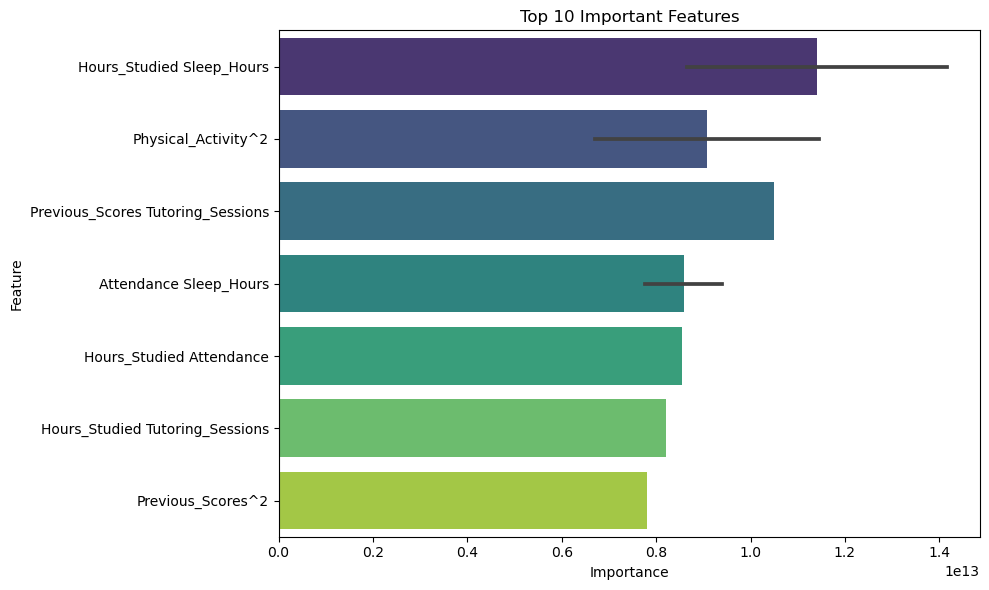

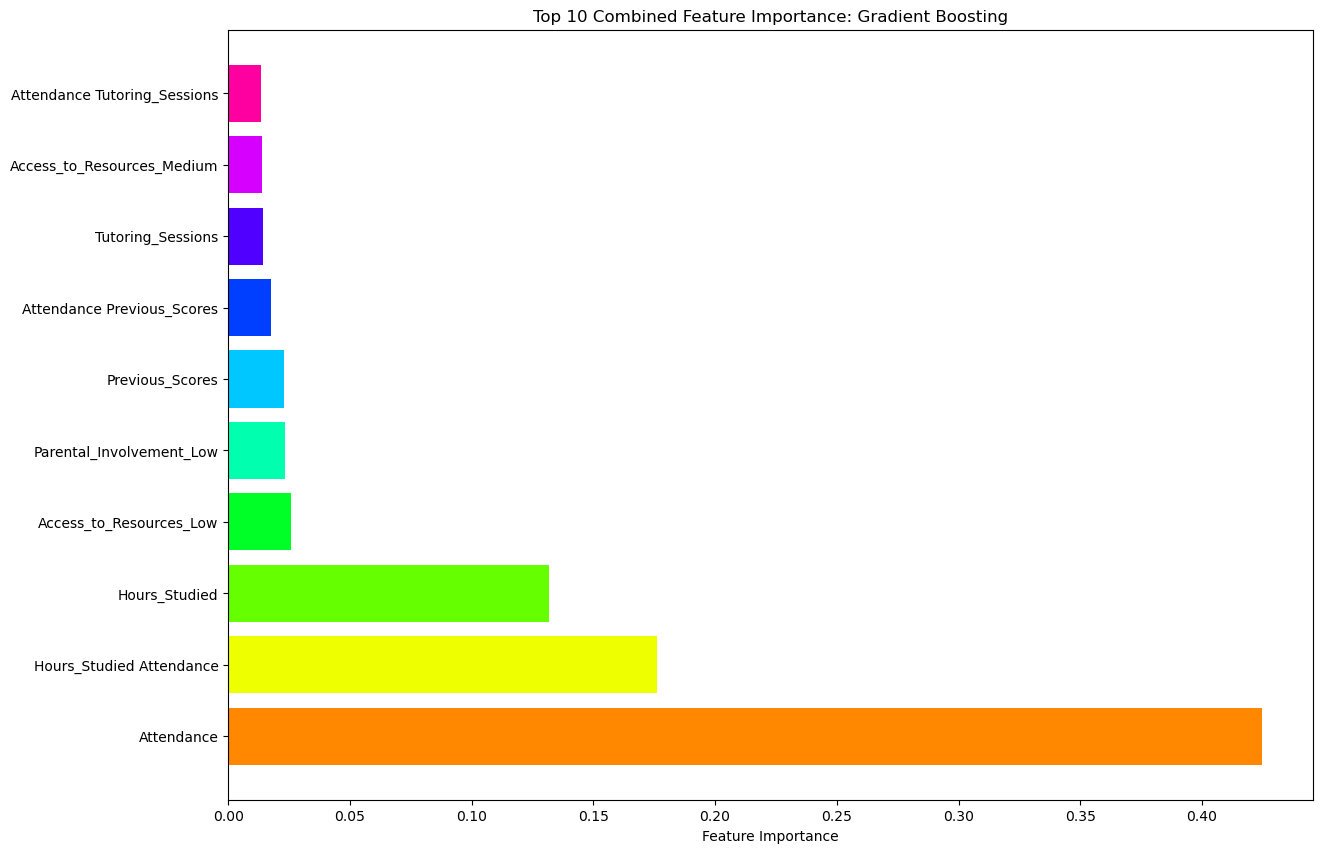

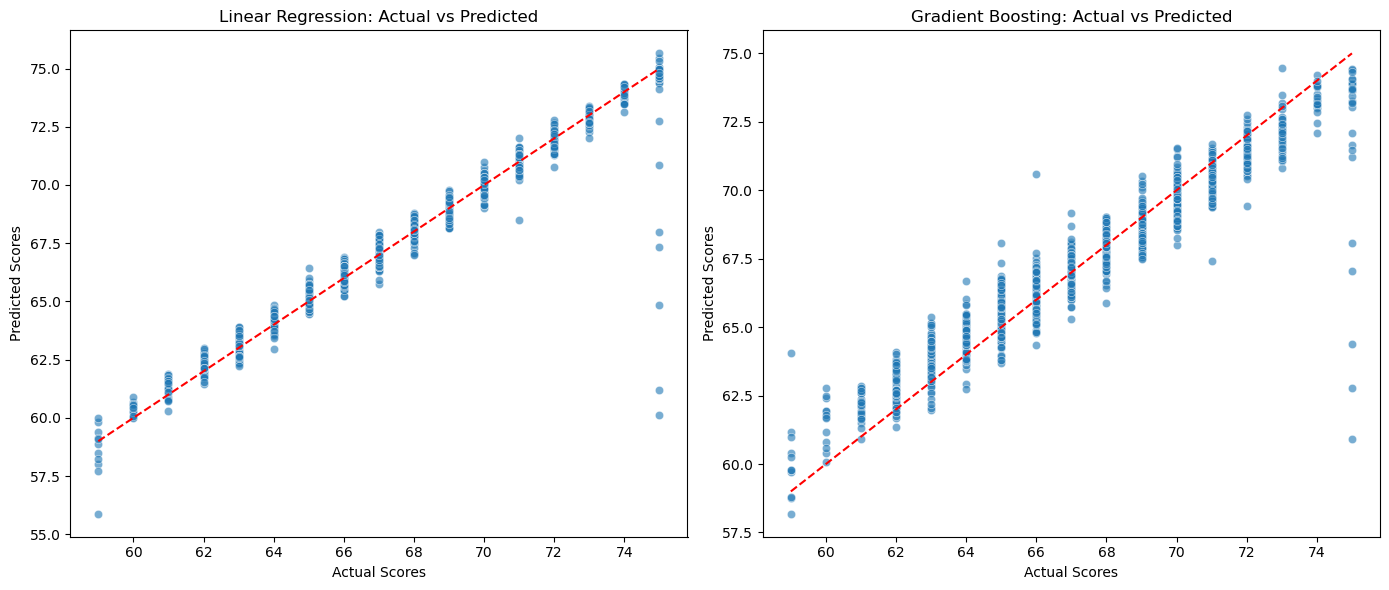

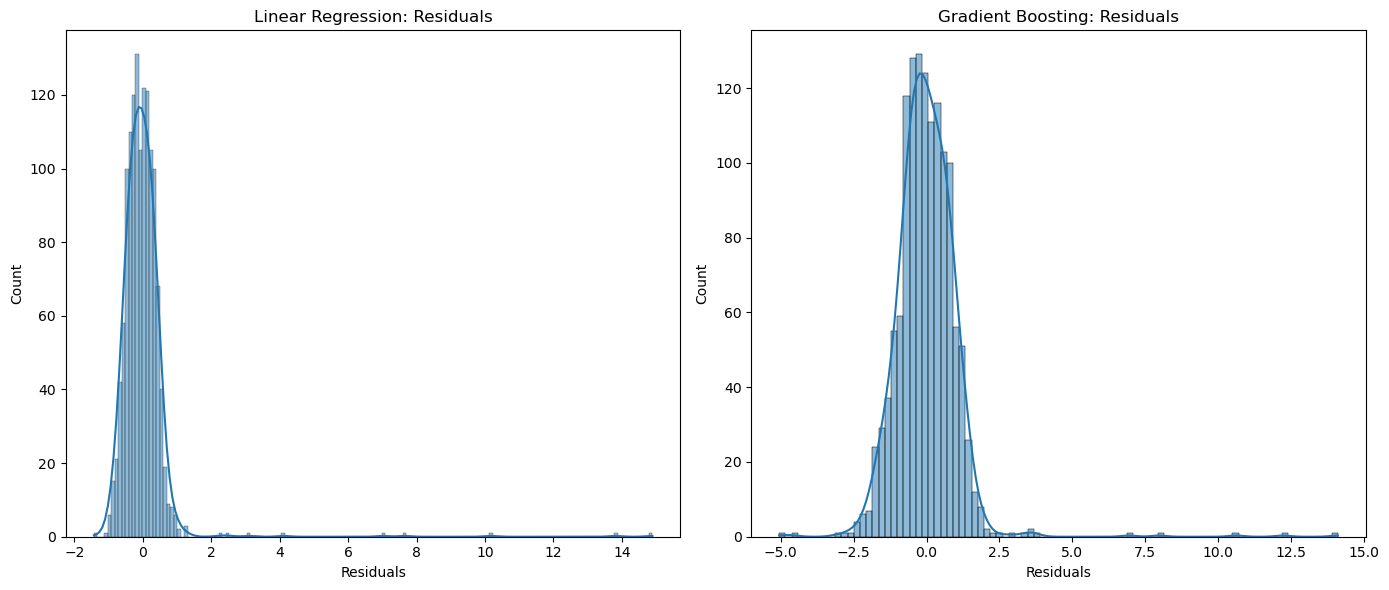

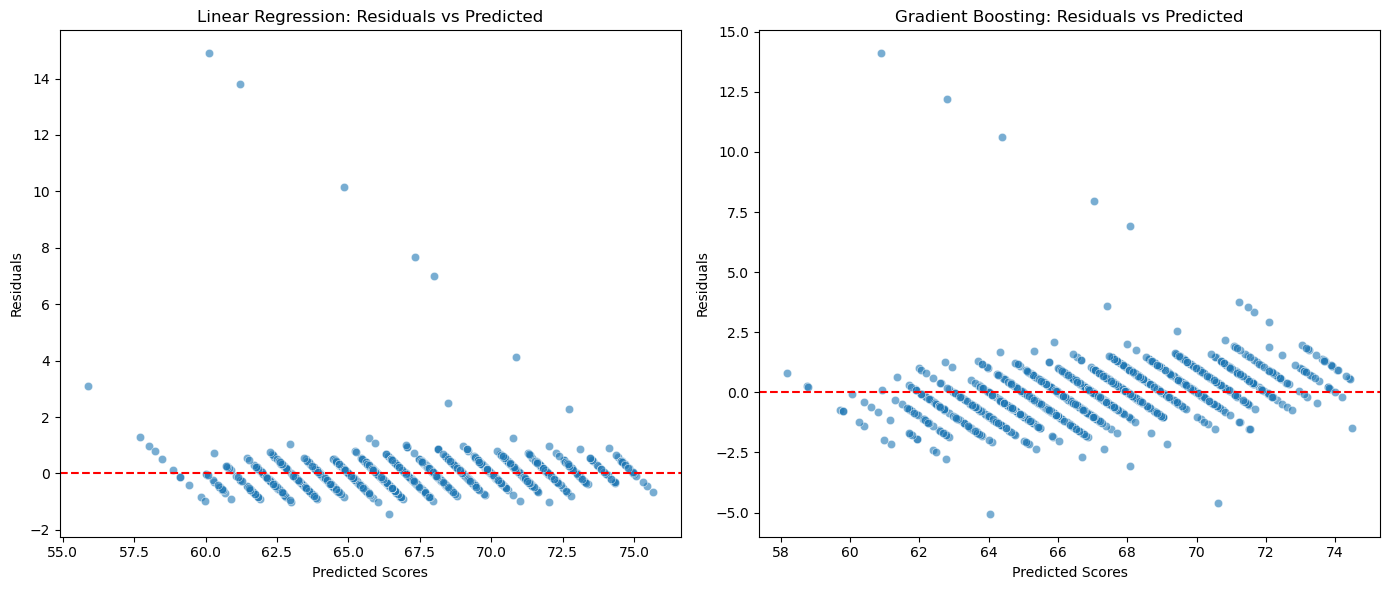

In [19]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])
poly_feature_names = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine with original data
df = pd.concat([df.drop(numerical_features, axis=1), df_poly], axis=1)
df = pd.get_dummies(df, drop_first=True)

# Split the data
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Get feature importance
importance = np.abs(lr.coef_)

# Create a DataFrame for better handling
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort by importance and select top 10 features
top_10_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

feature_importance = gb.feature_importances_
feature_names = np.array(X.columns)

# Combine duplicate features by summing their importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
combined_importance_df = feature_importance_df.groupby('feature').sum().reset_index()

# Sort by importance and keep the top 10 features
sorted_combined_df = combined_importance_df.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(14, 10))
colors = sns.color_palette('hsv', len(sorted_combined_df))  # Generate a different color for each feature
plt.barh(range(len(sorted_combined_df)), sorted_combined_df['importance'], color=colors, align='center')
plt.yticks(range(len(sorted_combined_df)), sorted_combined_df['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Combined Feature Importance: Gradient Boosting')
plt.show()

# Actual vs. Predicted Values
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Linear Regression: Actual vs Predicted')

# Gradient Boosting
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Gradient Boosting: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Residual Plot
residuals_lr = y_test - y_pred_lr
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True)
plt.xlabel('Residuals')
plt.title('Linear Regression: Residuals')

# Gradient Boosting Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_gb, kde=True)
plt.xlabel('Residuals')
plt.title('Gradient Boosting: Residuals')

plt.tight_layout()
plt.show()

# Residuals vs. Predicted Values
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs Predicted')

# Gradient Boosting
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_gb, y=residuals_gb, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residuals vs Predicted')

plt.tight_layout()
plt.show()



### Feature Importance:
 This bar plot shows which features are most influential in predicting the exam scores.

### Actual vs. Predicted Values: 
This scatter plot compares the actual exam scores with the predicted scores. The red line represents perfect predictions.

### Residual Plot: 
This histogram shows the distribution of residuals (errors). Ideally, residuals should be normally distributed around zero.

### Residuals vs. Predicted Values: 
This scatter plot helps identify any patterns in the residuals. Ideally, residuals should be randomly distributed around zero.

In [23]:
# Linear Regression metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

# Gradient Boosting metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}, R²: {r2_gb}")



Linear Regression - MAE: 0.3626030137603006, MSE: 0.6480702722017482, R²: 0.9425118675151911
Gradient Boosting - MAE: 0.7225639952887867, MSE: 1.19613127931611, R²: 0.8938952203116299


In [20]:
# Calculate R-squared values
r2_lr = r2_score(y_test, y_pred_lr)
r2_gb = r2_score(y_test, y_pred_gb)

# Convert to percentage
accuracy_lr = r2_lr * 100
accuracy_gb = r2_gb * 100

print(f"Linear Regression Accuracy: {accuracy_lr:.2f}%")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}%")


Linear Regression Accuracy: 94.25%
Gradient Boosting Accuracy: 89.39%


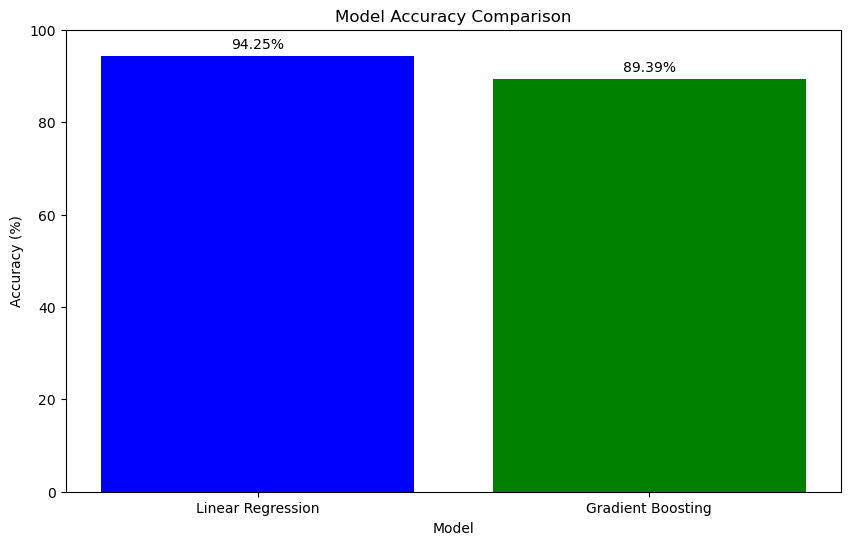

In [21]:
# Model names
models = ['Linear Regression', 'Gradient Boosting']
accuracies = [accuracy_lr, accuracy_gb]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.show()
